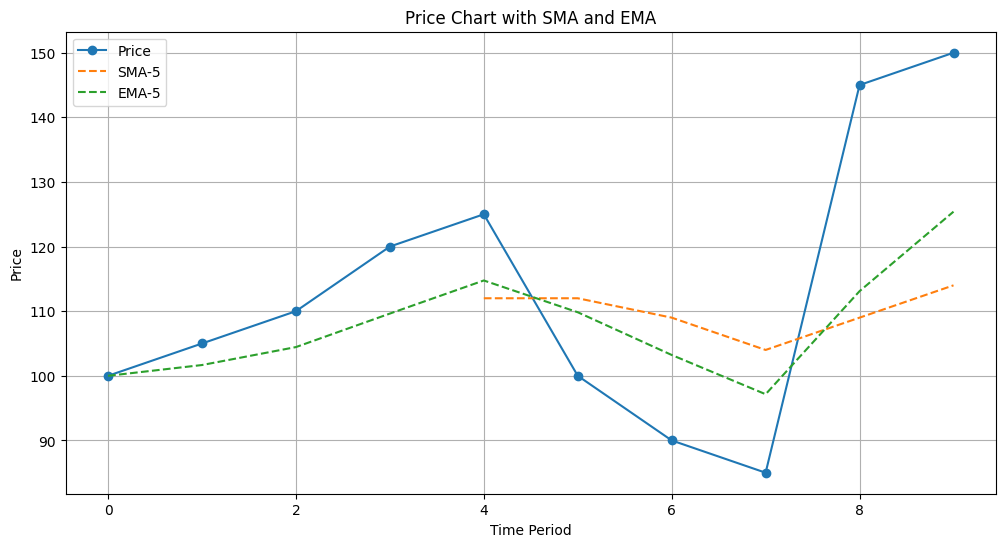

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample price data
prices = [100, 105, 110, 120, 125, 100, 90, 85, 145, 150]

# Calculate SMA and EMA
window = 5  # Adjust the window size as needed
sma = pd.Series(prices).rolling(window=window).mean()
ema = pd.Series(prices).ewm(span=window, adjust=False).mean()

# Plot the original prices and moving averages
plt.figure(figsize=(12, 6))
plt.plot(prices, label='Price', marker='o')
plt.plot(sma, label=f'SMA-{window}', linestyle='--')
plt.plot(ema, label=f'EMA-{window}', linestyle='--')

plt.title('Price Chart with SMA and EMA')
plt.xlabel('Time Period')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import yfinance as yf
data = yf.download(tickers='BTC-USD', period='max', interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [3]:
import pandas_ta as ta
data.ta.adx(high='High', low='Low', close='Close', length=14, append=True)

,ADX_14,DMP_14,DMN_14
Date,,,
2014-09-17,NaN,NaN,NaN
2014-09-18,NaN,NaN,NaN
2014-09-19,NaN,NaN,NaN
2014-09-20,NaN,NaN,NaN
2014-09-21,NaN,NaN,NaN
...,...,...,...
2024-05-15,19.130126,23.929984,15.579280
2024-05-16,19.373614,23.289385,14.722013
2024-05-17,19.890511,23.824308,13.809805


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume,ADX_14,DMP_14,DMN_14
Date,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,NaN,NaN
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,NaN,NaN
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,NaN,NaN
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-05-15,61553.988281,66454.453125,61330.410156,66267.492188,66267.492188,39815167074,19.130126,23.929984,15.579280
2024-05-16,66256.109375,66712.429688,64613.054688,65231.582031,65231.582031,31573077994,19.373614,23.289385,14.722013
2024-05-17,65231.296875,67459.460938,65119.316406,67051.875000,67051.875000,28031279310,19.890511,23.824308,13.809805


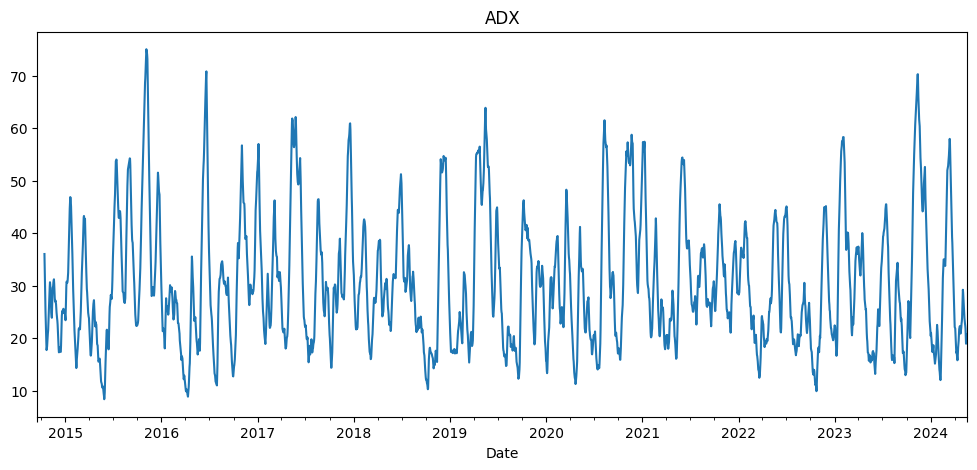

In [5]:
plt.figure(figsize=(12,5))
plt.title('ADX')
data['ADX_14'].plot()
plt.show()

In [6]:
import plotly.graph_objects as go
df = data[:500]
fig = go.Figure(data=[go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'],
                name='OHLC'),
                go.Scatter(x=df.index, y=df['ADX_14'], name='ADX', yaxis='y2')
                ])

fig.update_layout(
    title='OHLC with ADX(14)',
    yaxis=dict(
        domain=[0.2, 1]
    ),
    yaxis2=dict(
        domain=[0, 0.2],
        anchor='free',
        overlaying='y',
        side='right',
        title='ADX'
    ))

fig.show()
